# DATA PREPARATION

Import Data

In [1]:
import pandas as pd
import numpy as np

Load Data

In [2]:
path = "FactorsCardiovascular/heart_data.csv"
df = pd.read_csv(path)

Melihat tipe data dari setiap kolom

In [3]:
print(df.dtypes)

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


Dapat dilihat dari data di atas, semua data merupakan data numerik. Oleh karena itu, tidak ada data yang perlu dikonvert lagi dan sudah mudah dilihat korelasinya

Melihat contoh data dari dataframe untuk mengetahui apa yang perlu di preprocessing

In [4]:
df.head(20)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


Dari data di atas dapat kita lihat kebanyak data sudah sesuai yang diharapkan (satuannya masih umum). Akan tetapi pada data 'age' umur masih berupa hari sehingga akan susah untuk dikelompokan. Oleh karena itu, kita mengkonvertnya ke dalam satuan tahun.

In [5]:
ab=[]
for x in df["age"]:
    x1=x/365
    x1=round(x1)
    ab.append(x1)

df.insert(2,"AgeY",ab)

Melihat hasil dari convert yang kita lakukan, apakah sesuai?

In [6]:
df

,index,id,AgeY,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,52,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,48,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,53,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,62,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,52,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,61,22431,1,163,72.0,135,80,1,2,0,0,0,1


Mengabaikan dua kolom pertama karena tidak memberikan informasi yang diharapkan (hanya berupa index dan id sehingga tidak berkorelasi dengan penyakit cardio).

In [7]:
df_noid = df.iloc[:,2:]
df_noid

,AgeY,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,55,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,52,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,48,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,48,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Analisis Statistik dan Visualisasi

Melihat statistik keseluruhan data. Karena tidak ada data non-numeric sehingga tidak memerlukan describe(include='all).

In [8]:
df_noid.describe()

,AgeY,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Dari statistik tersebut kita dapat melihat:
1. Usia orang yang disurvei berada di antara 30 sampai 65 tahun.
2. Rata-rata tingkat kolesterol berada di 1.3 dari skala 5.
3. Hanya 0.09 orang yang merekok dari keseluruhan orang yang di survei.
4. Hampir setengah orang yang disurvei memiliki penyakit cardio vaskular

Melihat korelasi setiap kolom ke kolom yang lain terutama korelasi terhadap kolom 'cardio'.

In [9]:
df_noid.corr()

,AgeY,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
AgeY,1.000000,0.999090,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
age,0.999090,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.023017,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081456,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053661,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020793,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017754,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154386,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098596,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047884,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


Mem-visualisasikan korelasi dengan matplotlib dan seaborn

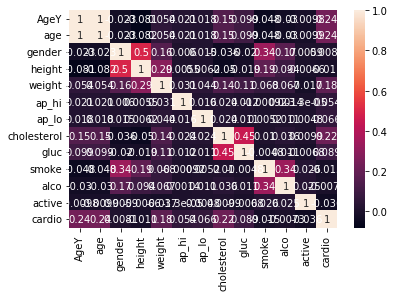

In [10]:
import matplotlib.pyplot as mp
import seaborn as sns

dataplot = sns.heatmap(df_noid.corr(), annot=True)
dataplot

## Dari tabel korelasi di atas, dapat kita lihat :
Tiga faktor utama yang grafiknya sebanding secara signifikan (lebih dari 0.1) dengan penyakit kardiovaskular adalah umur, berat, dan kadar kolestrol.

Mari buat kolom baru yaitu, faktor resiko yang akan kita beri nama 'risk' yaitu jumlah faktor resiko yang ada dalam setiap orang. 'risk' dihitung dari setiap satu di antara tiga faktor utama melebihi rata-ratanya maka akan kita tambah satu. 

In [11]:
risk = []
for i, row in df_noid.iterrows():
    score = 0
    if row['AgeY'] > 53.338686:
        score += 1
    if row['weight'] > 74.205690:
        score += 1
    if row['cholesterol'] > 1.366871:
        score += 1
    risk.append(score)
    
df_noid.insert(12,"risk",risk)


Melihat korelasi tabel ketika sudah ditambah kolom 'risk'.

In [12]:
df_noid.corr()

,AgeY,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,risk,cardio
AgeY,1.000000,0.999090,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.559477,0.237749
age,0.999090,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.559100,0.238159
gender,-0.023017,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.048866,0.008109
height,-0.081456,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,0.068674,-0.010821
weight,0.053661,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.518782,0.181660
ap_hi,0.020793,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.035799,0.054475
ap_lo,0.017754,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.037169,0.065719
cholesterol,0.154386,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.589289,0.221147
gluc,0.098596,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.279460,0.089307
smoke,-0.047884,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,0.020048,-0.015486


Dapat kita lihat kolom 'risk' ternyata sebanding dengan penyakit kardiovaskular.

### Melihat lebih detail tentang hubungan tiga faktor utama (ditambah risk) dengan penyakit kardiovaskular 

#### 1. Hubungan Kardivaskular dengan Age (dalam tahun)

In [13]:
df_noid.groupby('AgeY')['cardio'].mean()

AgeY
30    0.000000
39    0.222494
40    0.231111
41    0.271540
42    0.293064
43    0.388406
44    0.358125
45    0.381770
46    0.401015
47    0.462865
48    0.468065
49    0.443815
50    0.406114
51    0.436202
52    0.471620
53    0.471926
54    0.493153
55    0.544059
56    0.542364
57    0.549587
58    0.565065
59    0.567528
60    0.602196
61    0.649468
62    0.671676
63    0.713583
64    0.716071
65    0.687500
Name: cardio, dtype: float64

#### 2. Hubungan Kardivaskular dengan weight (di kelompokan per 20 kg)

In [14]:
df_noid.groupby(pd.cut(df_noid['weight'], bins=range(int(df_noid['weight'].min()), int(df_noid['weight'].max()), 20)))['cardio'].mean()

weight
(10, 30]      0.444444
(30, 50]      0.286198
(50, 70]      0.425997
(70, 90]      0.541741
(90, 110]     0.657702
(110, 130]    0.706220
(130, 150]    0.804196
(150, 170]    0.590909
(170, 190]    0.769231
Name: cardio, dtype: float64

#### 3. Hubungan Kardivaskular dengan kadar kolesterol

In [15]:
df_noid.groupby('cholesterol')['cardio'].mean()

cholesterol
1    0.440107
2    0.602157
3    0.765435
Name: cardio, dtype: float64

### Visualisasi hubungan tiga faktor utama (dan risk) dengan kardiovasular

#### 1.Grafik batang umur

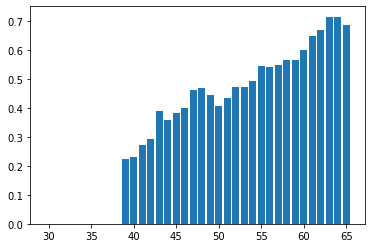

In [16]:
import matplotlib.pyplot as plt

agey_means = df_noid.groupby('AgeY')['cardio'].mean()
plt.bar(agey_means.index, agey_means)
plt.show()

#### 2.Grafik batang berat

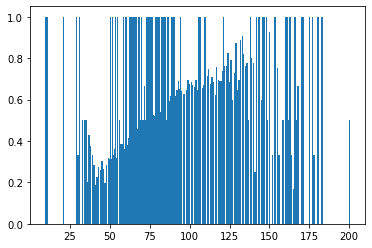

In [17]:
import matplotlib.pyplot as plt

weight_means = df_noid.groupby('weight')['cardio'].mean()
plt.bar(weight_means.index, weight_means)
plt.show()

#### 3. Grafik batang kadar kolesterol

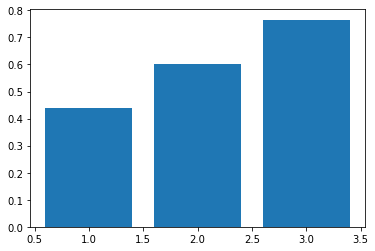

In [18]:
import matplotlib.pyplot as plt

cho_means = df_noid.groupby('cholesterol')['cardio'].mean()
plt.bar(cho_means.index, cho_means)
plt.show()

#### 4. Grafik batang 'risk'

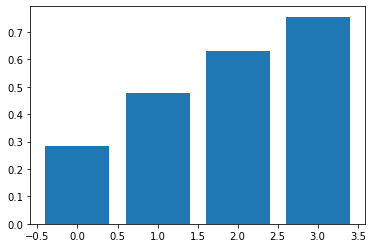

In [19]:
import matplotlib.pyplot as plt

risk_means = df_noid.groupby('risk')['cardio'].mean()
plt.bar(risk_means.index, risk_means)
plt.show()

# KESIMPULAN
## Tiga faktor utama yang berpengaruh pada penyakit kardiovaskular adalah umur, berat, dan kadar kolestrol. Selain itu, semakin banyak total faktor resiko yang dimiki setiap orang, semakin tinggi juga kemungkinan seseorang terkena penyakit kardiovaskular.